# Исследование продаж компъютерных игр

**Описание исследования**  

Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Представленные данные относятся к периоду до 2016 г. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель исследования**  
1. Построить модель, позволяющую на основе имеющихся данных спрогнозировать наиболее успешные проекты будущего года
1. Определить наиболее перспективные платформы 
1. Определить средний портрет пользователя в различных регионах

**Ход исследования**

Данные получим из файла, лежащего по следующему пути `/datasets/games.csv`. 

Первоочередной задачей является общий обзор и анализ качества полученных данных. Далее необходимо произвести предобработку данных с целью их оптимизации и избавления от возможных пропусков, дубликатов, аномалий и выбросов, которые в дальнейшем могут исказить результаты исследования. На данном этапе важно не перестараться чтобы не испортить качество данных самому. На основе обработанного набора данных производится расчет дополнительных параметров (столбцов), после чего начинается исследовательский анализ. 

Таким образом, выполнение исследования можно разделить на следующие этапы:
- Обзор данных
- Предобработка данных
- Расчет дополнительных параметров (расширение набора данных)
- Исследовательский анализ данных
- Проверка гипотез
- Общий вывод по проведенному исследованию


## Обзор данных

### Импортируем необходимые библиотеки и считыем данных csv-файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    df = pd.read_csv(
        r"C:\workspace\yandex_cources\full_history\sprint_4_first_checkpoint\data\games.csv"
    )
except:
    df = pd.read_csv("/datasets/games.csv")

Рассмотрим данные поподробнее при помощи стандартных методов.

### Метод .head()

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales* — продажи в Северной Америке (миллионы проданных копий)
- *EU_sales* — продажи в Европе (миллионы проданных копий)
- *JP_sales* — продажи в Японии (миллионы проданных копий)
- *Other_sales* — продажи в других странах (миллионы проданных копий)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Метод .info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть толбцы, наполовину забитые пропусками - это выглядит стремно.

### Метод .describe()

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


### Метод .columns

In [6]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В предобработке надо будет привести названия колонок к классическому змеиному регистру.

### Гистограммы

Для столбца Name построить гистограмму не вышло.
Для столбца Platform построить гистограмму не вышло.
Для столбца Genre построить гистограмму не вышло.
Для столбца User_Score построить гистограмму не вышло.
Для столбца Rating построить гистограмму не вышло.


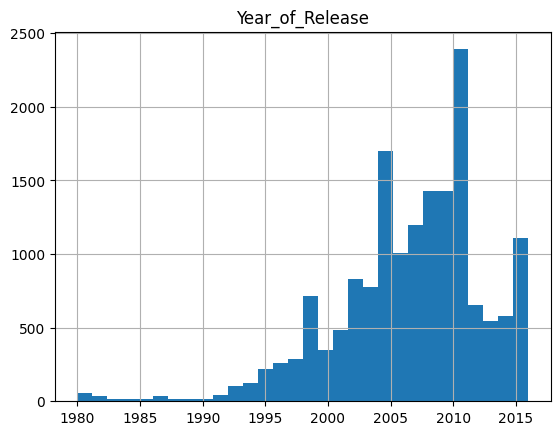

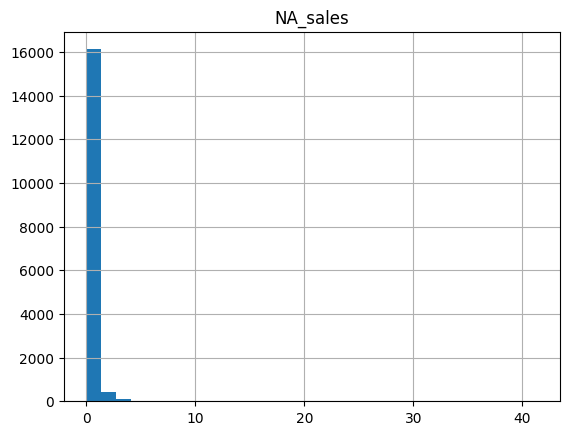

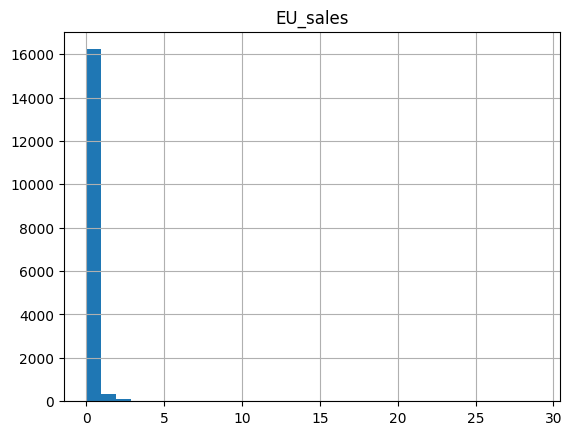

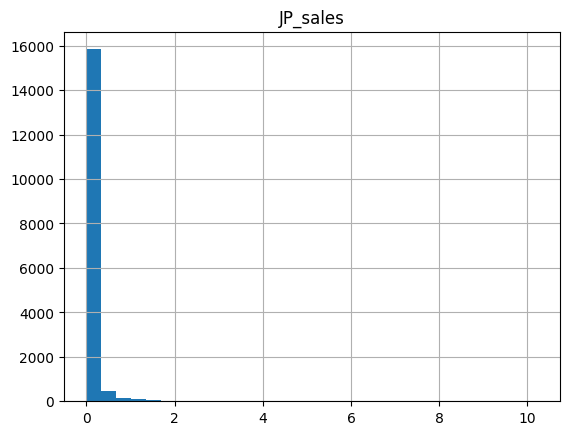

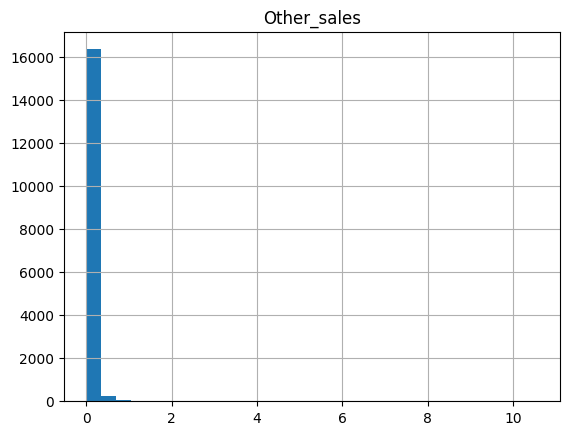

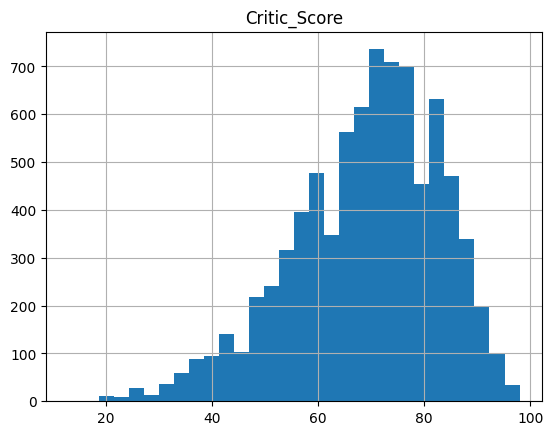

In [7]:
for column in df:
    try:
        df.hist(column=column, bins=30)
    except:
        print(f"Для столбца {column} построить гистограмму не вышло.")

Пока ничего занятного, не считая пиков по количеству выпущенных игр в 1998, 2004, 2010 и 2015 годах. К слову, если когда-нибудь изобретут машину времени, то я обязательно схожу на E3-2004. Правда, перед этим придется стереть себе некоторую часть памяти. 

### Вывод по этапу

Полученный датасет весьма обширен. Это хорошо, можно построить достаточно точную модель. Имеются проблемы по пропускам. Присутствуют выбивающиеся значения в числе выпущенных игр по годам. 

## Предобработка данных

### snake_case

In [8]:
df.columns = df.columns.str.lower()

### Проверка на явные дубликаты

In [9]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют

### Проверка на неявные дубликаты

Рассматривать будем столбцы с категориальными данными. Для начала приведем их к нижнему регистру, за исключением столбца rating - ему уготован верхний регистр. Это нужно чтобы исключить возможные ошибки в регистре. 

In [10]:
lower_case_columns = ["name", "platform", "genre"]
for column in lower_case_columns:
    df[column] = df[column].str.lower()

df["rating"].str.upper()
df.sample()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14396,jikandia: the timeless land,psp,2010.0,role-playing,0.03,0.0,0.0,0.0,60.0,7.2,T


#### name

In [11]:
len(df["name"].unique())

11560

Изначально у нас было 16713 строк. Уникальных имен 11560. Значит точно есть повторы.

In [12]:
name_count = df["name"].value_counts()
print(len(name_count))

name_count_multi = name_count[name_count != 1]
print(len(name_count_multi))
name_count_multi.head(5)

11559
2805


name
need for speed: most wanted    12
ratatouille                     9
lego marvel super heroes        9
fifa 14                         9
madden nfl 07                   9
Name: count, dtype: int64

В нашем распоряжении имеется 2805 строк названий, которые повторяются несколько раз. Посмотрим на самого злостного "нарушителя":

In [13]:
df[df["name"] == "need for speed: most wanted"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,need for speed: most wanted,ps2,2005.0,racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,ps3,2012.0,racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,x360,2012.0,racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,x360,2005.0,racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,xb,2005.0,racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,psv,2012.0,racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,gc,2005.0,racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,pc,2005.0,racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,wiiu,2013.0,racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,ds,2005.0,racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Целый ящик Пандоры. Разберем по порядку: 
NFS: Most Wanted выходил в 2005, 2012 и 2013 годах. Благодаря гуглу и википедии стало понятно, что это связано с перезапуском игры 2005 года в 2012 году. Этим же объясняется "двойной" выход на некоторых платформах. Выпуск образца 2013 года - это тот же NFS: MW 2012 года, только для WiiU.  
Стоит отметить что нам известен возрастной рейтинг для обеих версий, значит можем заполнить пропуски в данном столбце. Правда это не поможет исправить critic и user_score'ы, ведь они прописаны для каждой отдельной платформы. 

В целом, это многое говорит о структуре данных. Если игра выходила не нескольких платформах, то она может быть записана отдельной строкой. Таких игр у нас 2805, то есть 16713 - 11560 + 2805 ~= 8 тысяч строк. Но тогда получается, что еще ~9000 строк посвящены играм, которые выходили лишь на одной платформе (или была добавлена информация только по одной платформе).

In [14]:
df.query("name not in @name_count_multi.index").head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,E
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
6,new super mario bros.,ds,2006.0,platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,wii,2006.0,misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,wii,2009.0,platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,nes,1984.0,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005.0,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
11,mario kart ds,ds,2005.0,racing,9.71,7.47,4.13,1.90,91.0,8.6,E


Подведем итог по столбцу name: дубликаты в данном столбце имеют право на существование, поскольку они означают выход игры на нескольких платформах. 

#### platform

In [15]:
df["platform"].unique()

array(['wii', 'nes', 'gb', 'ds', 'x360', 'ps3', 'ps2', 'snes', 'gba',
       'ps4', '3ds', 'n64', 'ps', 'xb', 'pc', '2600', 'psp', 'xone',
       'wiiu', 'gc', 'gen', 'dc', 'psv', 'sat', 'scd', 'ws', 'ng', 'tg16',
       '3do', 'gg', 'pcfx'], dtype=object)

Здесь неявных дубликатов  нет. Платформа "2600" - не ошибка, имеется в виду Atari 2600 (опять же, спасибо гуглу и википедии). 

#### genre

In [16]:
df["genre"].unique()

array(['sports', 'platform', 'racing', 'role-playing', 'puzzle', 'misc',
       'shooter', 'simulation', 'action', 'fighting', 'adventure',
       'strategy', nan], dtype=object)

Тоже все хорошо, не считая `nan`, которыми займемся позже.

### Проверка типов данных

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### user_score

Столбец user_score должен содержать числа, однако помечен как object. Причиной этому служат значения To Be Determined. 

In [18]:
df[df["user_score"] == "tbd"]["user_score"].count()

2424

In [19]:
df["user_score"].isna().sum()

6701

Заменим tbd на NaN, чтобы возможно было привести к типу float.

In [20]:
df["user_score"] = pd.to_numeric(df["user_score"], errors="coerce")

In [21]:
df["user_score"].isna().sum()

9125

#### year_of_release

Данный столбец хорошо бы привести к типу `int`, однако этому мешает наличие пропусков, поэтому изменение типа будет сделано в следующем пункте. 

### Посмотрим какое количество пропусков (в %) имеется в каждом отдельном столбце

In [22]:
pd.DataFrame(round(df.isna().mean() * 100, 3)).style.background_gradient("coolwarm")

,0
name,0.012000
platform,0.000000
year_of_release,1.609000
genre,0.012000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.319000
user_score,54.592000


In [23]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

#### name

Название игры вряд ли получится восстановить и строк с пропусками всего две, поэтому удалим их.

In [24]:
df.dropna(subset=["name"], inplace=True)
df["name"].isna().sum()

0

#### year_of_release

In [25]:
df["year_of_release"].isna().sum()

269

Пропусков немного, всего 2%. Но поскольку благодаря особенностям структуры датасета можно попытаться восстановить год выхода по данным относительно другой платформы, что однозначно стоит попробовать. 

In [26]:
years_na = df[df["year_of_release"].isna()]

In [27]:
for game in years_na["name"]:
    year = df[(df["name"] == game) & ~(df["year_of_release"].isna())]["year_of_release"]
    if len(year) != 0 and np.std(year) == 0:
        year = year.median()
        df.loc[
            (df["name"] == game) & (df["year_of_release"].isna()), "year_of_release"
        ] = year

df["year_of_release"].isna().sum()

158

Оставшиеся строки с пропусками удалим, поскольку они будут мешать дальнейшему анализу. 

In [28]:
df.dropna(subset=["year_of_release"], inplace=True)
df["year_of_release"].isna().sum()

0

Наконец, можно привести столбец к типу `int`. 

In [29]:
df["year_of_release"] = df["year_of_release"].astype("int")

Не получилось отвергнуть нулевую гипотезу


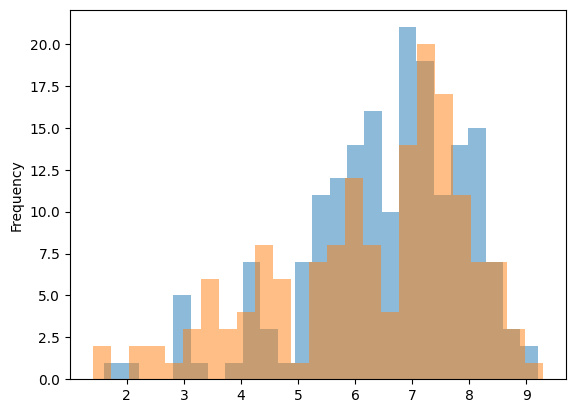

In [30]:
rating_xone = df[
    (df["platform"] == "xone")
    & (~df["user_score"].isna())
    & (df["year_of_release"] > 2012)
]["user_score"]
rating_pc = df[
    (df["platform"] == "pc")
    & (~df["user_score"].isna())
    & (df["year_of_release"] > 2012)
]["user_score"]
rating_xone.plot(kind="hist", bins=25, alpha=0.5)
rating_pc.plot(kind="hist", bins=25, alpha=0.5)
result = st.ttest_ind(rating_xone, rating_pc)
alpha = 0.05
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

#### critic_score

Выдвенем предположение, что рейтинг игры приблизительно одинаков на всех платформах. Тогда можно попытаться заполнить пропуски медианными значениями среди других платформ. 

In [31]:
# в процессе работы над пунктом обнаружилось, что у некоторых названий в начале есть лишний пробел
for index in df.index:
    df.loc[index, "name"] = df.loc[index, "name"].lstrip()

In [32]:
display(len(df[df["critic_score"].isna()]))
df[df["critic_score"].isna()].head(10)

8487

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [33]:
critic_score_na = df[df["critic_score"].isna()]
for game in critic_score_na["name"]:
    score = df[(df["name"] == game) & ~(df["critic_score"].isna())]["critic_score"]
    if len(score) != 0:
        score = score.median()
        df.loc[
            (df["name"] == game) & (df["critic_score"].isna()), "critic_score"
        ] = score

df["critic_score"].isna().sum()

7531

Почти тысячу пропусков удалось заполнить. Оставшиеся пропуски заполнить нечем, но потерять столько строк нельзя. Значит придется оставить как есть. 

#### user_score

Попробуем заполнить пропуски аналогично столбцу `critic_score`.

In [34]:
print(len(df[df["user_score"].isna()]))
df[df["user_score"].isna()].head(10)

9020


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,ds,2005,simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,pokemon gold/pokemon silver,gb,1999,role-playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,super mario world,snes,1990,platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,pokemon diamond/pokemon pearl,ds,2006,role-playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,super mario land,gb,1989,platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,super mario bros. 3,nes,1988,platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [35]:
ttest_info = []
user_score_na = df[df["user_score"].isna()]
for game in user_score_na["name"]:
    score = df[(df["name"] == game) & ~(df["user_score"].isna())]["user_score"]
    if len(score) != 0:
        score = score.median()
        for index in df[(df["name"] == game) & (df["user_score"].isna())].index:
            ttest_info.append(index)
        df.loc[(df["name"] == game) & (df["user_score"].isna()), "user_score"] = score

df["user_score"].isna().sum()

7930

Удалось сократить число пропусков на тысячу с небольшим строк.

In [36]:
ttest_info = pd.Series(ttest_info)
ttest_info_df = df.loc[ttest_info]
display(ttest_info_df[ttest_info_df["year_of_release"] > 2012]["platform"].unique())
ttest_info_df[ttest_info_df["year_of_release"] > 2012].head(15)

array(['ps4', 'wiiu', '3ds', 'xone', 'ps3', 'wii', 'x360', 'psv', 'pc',
       'psp', 'ds'], dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
225,the last of us,ps4,2014,action,1.88,2.00,0.07,0.77,95.0,9.10,NaN
6273,need for speed: most wanted,wiiu,2013,racing,0.13,0.12,0.00,0.02,82.0,8.50,NaN
912,donkey kong country returns,3ds,2013,platform,0.74,0.62,0.41,0.13,87.0,8.60,NaN
957,diablo iii,ps4,2014,role-playing,0.51,0.98,0.06,0.28,87.0,6.40,M
3045,diablo iii,xone,2014,role-playing,0.36,0.24,0.00,0.06,87.0,6.40,NaN
978,the legend of zelda: the wind waker,wiiu,2013,action,0.92,0.60,0.14,0.14,96.0,8.90,NaN
1012,the elder scrolls online,ps4,2015,role-playing,0.67,0.79,0.00,0.29,74.0,7.05,NaN
1018,kingdom hearts,ps3,2013,role-playing,0.90,0.35,0.25,0.24,85.0,8.80,NaN
1290,lego city undercover,3ds,2013,platform,0.52,0.77,0.07,0.11,80.0,8.20,NaN
1475,the elder scrolls v: skyrim,ps4,2016,role-playing,0.48,0.59,0.04,0.21,94.0,8.10,NaN


In [37]:
df[df["name"] == "diablo iii"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
192,diablo iii,pc,2012,role-playing,2.44,2.16,0.00,0.54,88.0,4.0,M
907,diablo iii,ps3,2013,role-playing,0.72,0.75,0.15,0.29,86.0,6.4,M
957,diablo iii,ps4,2014,role-playing,0.51,0.98,0.06,0.28,87.0,6.4,M
1371,diablo iii,x360,2013,role-playing,0.90,0.39,0.00,0.12,87.0,6.6,M
3045,diablo iii,xone,2014,role-playing,0.36,0.24,0.00,0.06,87.0,6.4,NaN


#### rating

Известно, что игра может попадаться в датасете несколько раз, однако в зависимости от года выхода рейтинг также может меняться. Зная это, попробуем заполнить пропуски. 

In [38]:
df["rating"].isna().sum()

6695

In [39]:
rating_na = df[df["rating"].isna()]
for game, year in zip(rating_na["name"], rating_na["year_of_release"]):
    rating = df[
        (df["name"] == game) & (df["year_of_release"] == year) & ~(df["rating"].isna())
    ]["rating"]
    if len(rating) != 0:
        rating = rating.head(1)
        rating.reset_index(drop=True, inplace=True)
        df.loc[
            (df["name"] == game)
            & (df["year_of_release"] == year)
            & (df["rating"].isna()),
            "rating",
        ] = rating.loc[0]

df["rating"].isna().sum()

6471

Заполнилось всего 200 строк, но это тоже результат. 

In [40]:
df["rating"].replace(np.nan, "UNKNOWN", inplace=True)
df["rating"].isna().sum()

0

### Вывод по этапу

В ходе выполнения предобработки датасета были выполнены следующие действия:
- Приведение названий столбцов к snake_case;
- Проверка на явные дубликаты;
- Проверка столбцов `name`, `platform` и `genre` на неявные дубликаты;
- Проверка типов данных;
- Обработаны пропуски в столбцах `name`, `year_of_release`, `critic_score`, `user_score` и `rating`.

## Добавление новых столбцов

### Суммарные продажи по всем регионам 

In [41]:
df["total_sales"] = df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
360,cooking mama 2: dinner with friends,ds,2007,simulation,1.60,1.49,0.10,0.39,70.0,8.0,E,3.58
673,donkey kong land ii,gb,1996,platform,1.39,0.48,0.40,0.08,NaN,NaN,UNKNOWN,2.35
12505,minna no ds seminar: kanpeki eitango ryoku,ds,2006,misc,0.00,0.00,0.06,0.00,NaN,NaN,UNKNOWN,0.06
14480,neverwinter nights,pc,2002,role-playing,0.00,0.03,0.00,0.00,91.0,8.2,T,0.03
6143,mega man ii,gb,1991,platform,0.00,0.00,0.28,0.00,NaN,NaN,UNKNOWN,0.28


### Вывод по этапу: 

Ну.. у нас появился столбец с глобальными продажами. Это хорошо.

## Исследовательский анализ

### Статистика выхода по годам

При подсчете числа вышедших игр в год стоит учесть, что для каждой платформы существует отдельная строка. 

In [42]:
year_stat_cut = df[["name", "year_of_release"]]
len(year_stat_cut)

16555

In [43]:
year_stat_cut.insert(2, "check", np.nan)

In [44]:
pd.options.mode.chained_assignment = (
    None  # чтобы бессмысленное предупреждение не светилось
)
check_list = []
for index in year_stat_cut.index:
    name = year_stat_cut.loc[index, "name"]
    year = year_stat_cut.loc[index, "year_of_release"]
    row_check = f"{name}:{year}"
    if row_check not in check_list:
        year_stat_cut.loc[index, "check"] = 1
        check_list.append(row_check)

year_stat_cut.dropna(inplace=True)

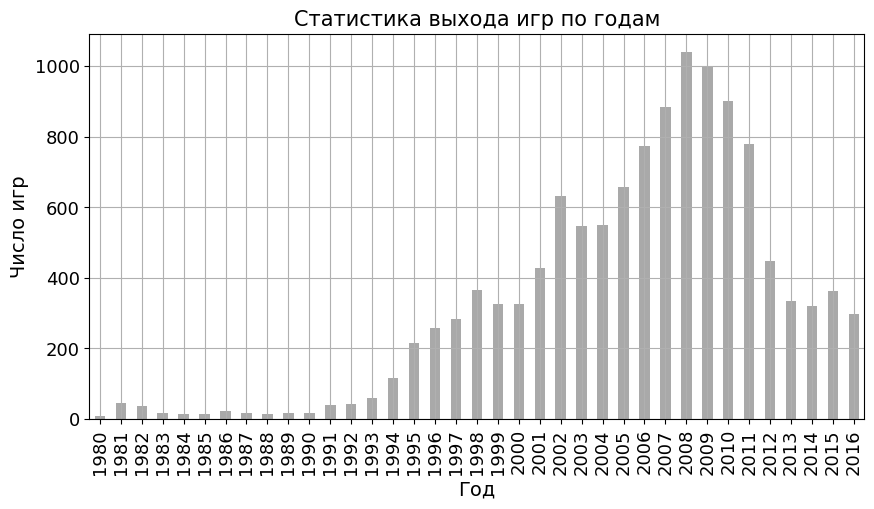

In [45]:
release_year_stats = year_stat_cut.pivot_table(
    index="year_of_release", values="name", aggfunc="count"
)
release_year_stats.plot.bar(
    figsize=(10, 5),
    legend=False,
    grid=True,
    color="darkgrey",
    fontsize=13,
)
plt.xlabel("Год", fontsize=14)
plt.ylabel("Число игр", fontsize=14)
plt.title("Статистика выхода игр по годам", fontsize=15)

**Вывод:**  
Увеличение числа выходящих в год игр начинается примерно в 90-м году, продолжается до 1998, выходит на небольшое плато в 1999-2000 годах и затем снова устремляется вверх. График имеет выраженный пик в районе 2008 года, после которого число выходящих в год игр возвращается на уровень 1999-2000 годов. 

### Распределение продаж по платформам и годам

In [46]:
sales_on_platform = df.pivot_table(
    index="platform", values="total_sales", aggfunc="sum"
).sort_values(by="total_sales", ascending=False)

best_sales_on_platform = sales_on_platform[sales_on_platform["total_sales"] > 100]
best_sales_on_platform

,total_sales
platform,
ps2,1245.96
x360,966.61
ps3,934.71
wii,903.31
ds,804.28
ps,727.58
ps4,314.14
gba,313.73
psp,292.77


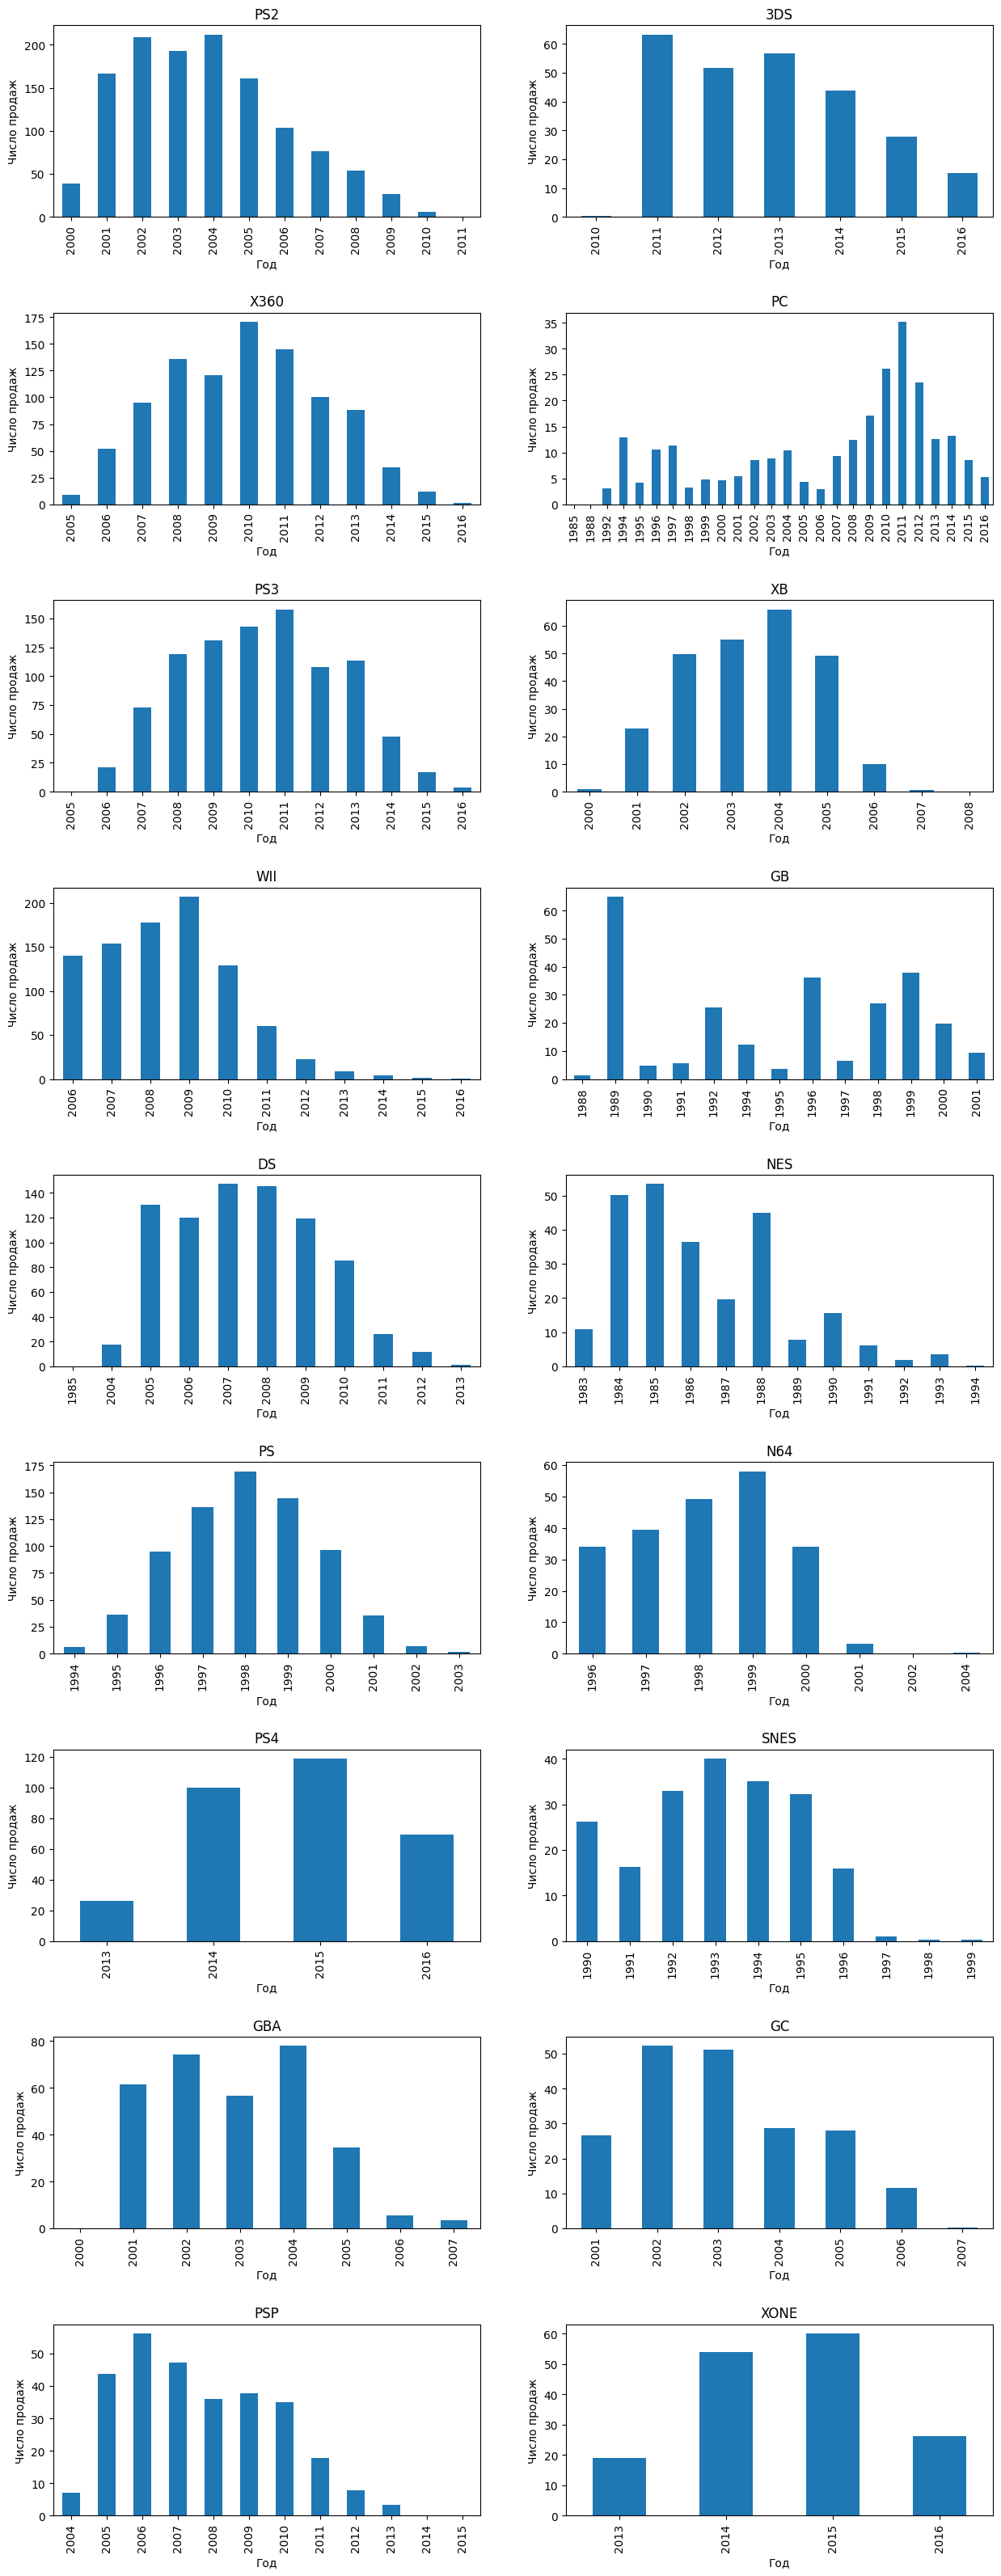

In [47]:
sales_on_platform_per_year = df.pivot_table(
    index=["platform", "year_of_release"], values="total_sales", aggfunc="sum"
).reset_index()

figure, ax = plt.subplots(9, 2, figsize=(15, 40), gridspec_kw={"hspace": 0.5})
i = 0
j = 0
for platform in best_sales_on_platform.index:
    sales_on_platform_per_year[sales_on_platform_per_year["platform"] == platform].plot(
        ax=ax[i, j],
        kind="bar",
        x="year_of_release",
        y="total_sales",
        legend=False,
        xlabel="Год",
        ylabel="Число продаж",
        title=platform.upper(),
    )
    i += 1
    if i == 9:
        i = 0
        j = 1

**Вывод:**  
Судя по представленным графикам, жизненный цикл платформы составляет 5-10 лет. Это может не относиться к ранним консолям, закономерноcть начинает работать в 90-ые. Также ее трудно применить к персональным компьютерам, поскольку данная платформа не имеет конкретного модельного ряда. 

### Определение актуального для исследования периода

Согласно двум предыдущим подпунктам, жизненный цикл платформы составлят 5-10 лет, а наибольшее число игр вышло в 2008 году, после чего оно начало сокращаться. В совокупности это может говорить о том, что во время смены поколений платформ также происходит переход к новым принципам разработки игр, что, в свою очередь, меняет предпочтения пользователей. Поэтому я буду рассматривать период в 3 года (с момента появления актуального поколения консолей PS и Xbox), то есть 2013-2016 года. 

### Потенциал исследуемых платформ

Определим платформы, которые попадают в каждый в указанный период: 

In [48]:
opening_year = 2013

In [49]:
platforms2013 = df[df["year_of_release"] >= opening_year]["platform"].unique()
display(platforms2013)

array(['ps3', 'x360', 'ps4', '3ds', 'xone', 'wiiu', 'wii', 'pc', 'psv',
       'ds', 'psp'], dtype=object)

In [50]:
df_new = df[
    (df["platform"].isin(platforms2013)) & (df["year_of_release"] >= opening_year)
]
df_new.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14643,kung fu panda: showdown of legendary legends,3ds,2015,action,0.00,0.03,0.00,0.00,NaN,6.8,E10+,0.03
6628,just dance 2015,ps3,2014,misc,0.13,0.08,0.00,0.04,72.0,6.8,E10+,0.25
14408,hakuoki zuisouroku omokage hana,psv,2015,action,0.00,0.00,0.03,0.00,NaN,NaN,UNKNOWN,0.03
11495,sniper: ghost warrior 2,pc,2013,shooter,0.02,0.05,0.00,0.01,52.0,5.8,M,0.08
14353,turbo: super stunt squad,ds,2013,sports,0.00,0.03,0.00,0.00,38.0,4.5,E,0.03


In [51]:
new_platform_sales = df_new.pivot_table(
    index=["platform", "year_of_release"], values="total_sales", aggfunc="sum"
).reset_index()

new_platform_sales.sample(5)

,platform,year_of_release,total_sales
11,ps3,2015,16.82
4,ds,2013,1.54
36,xone,2013,18.96
3,3ds,2016,15.14
29,wiiu,2014,22.03


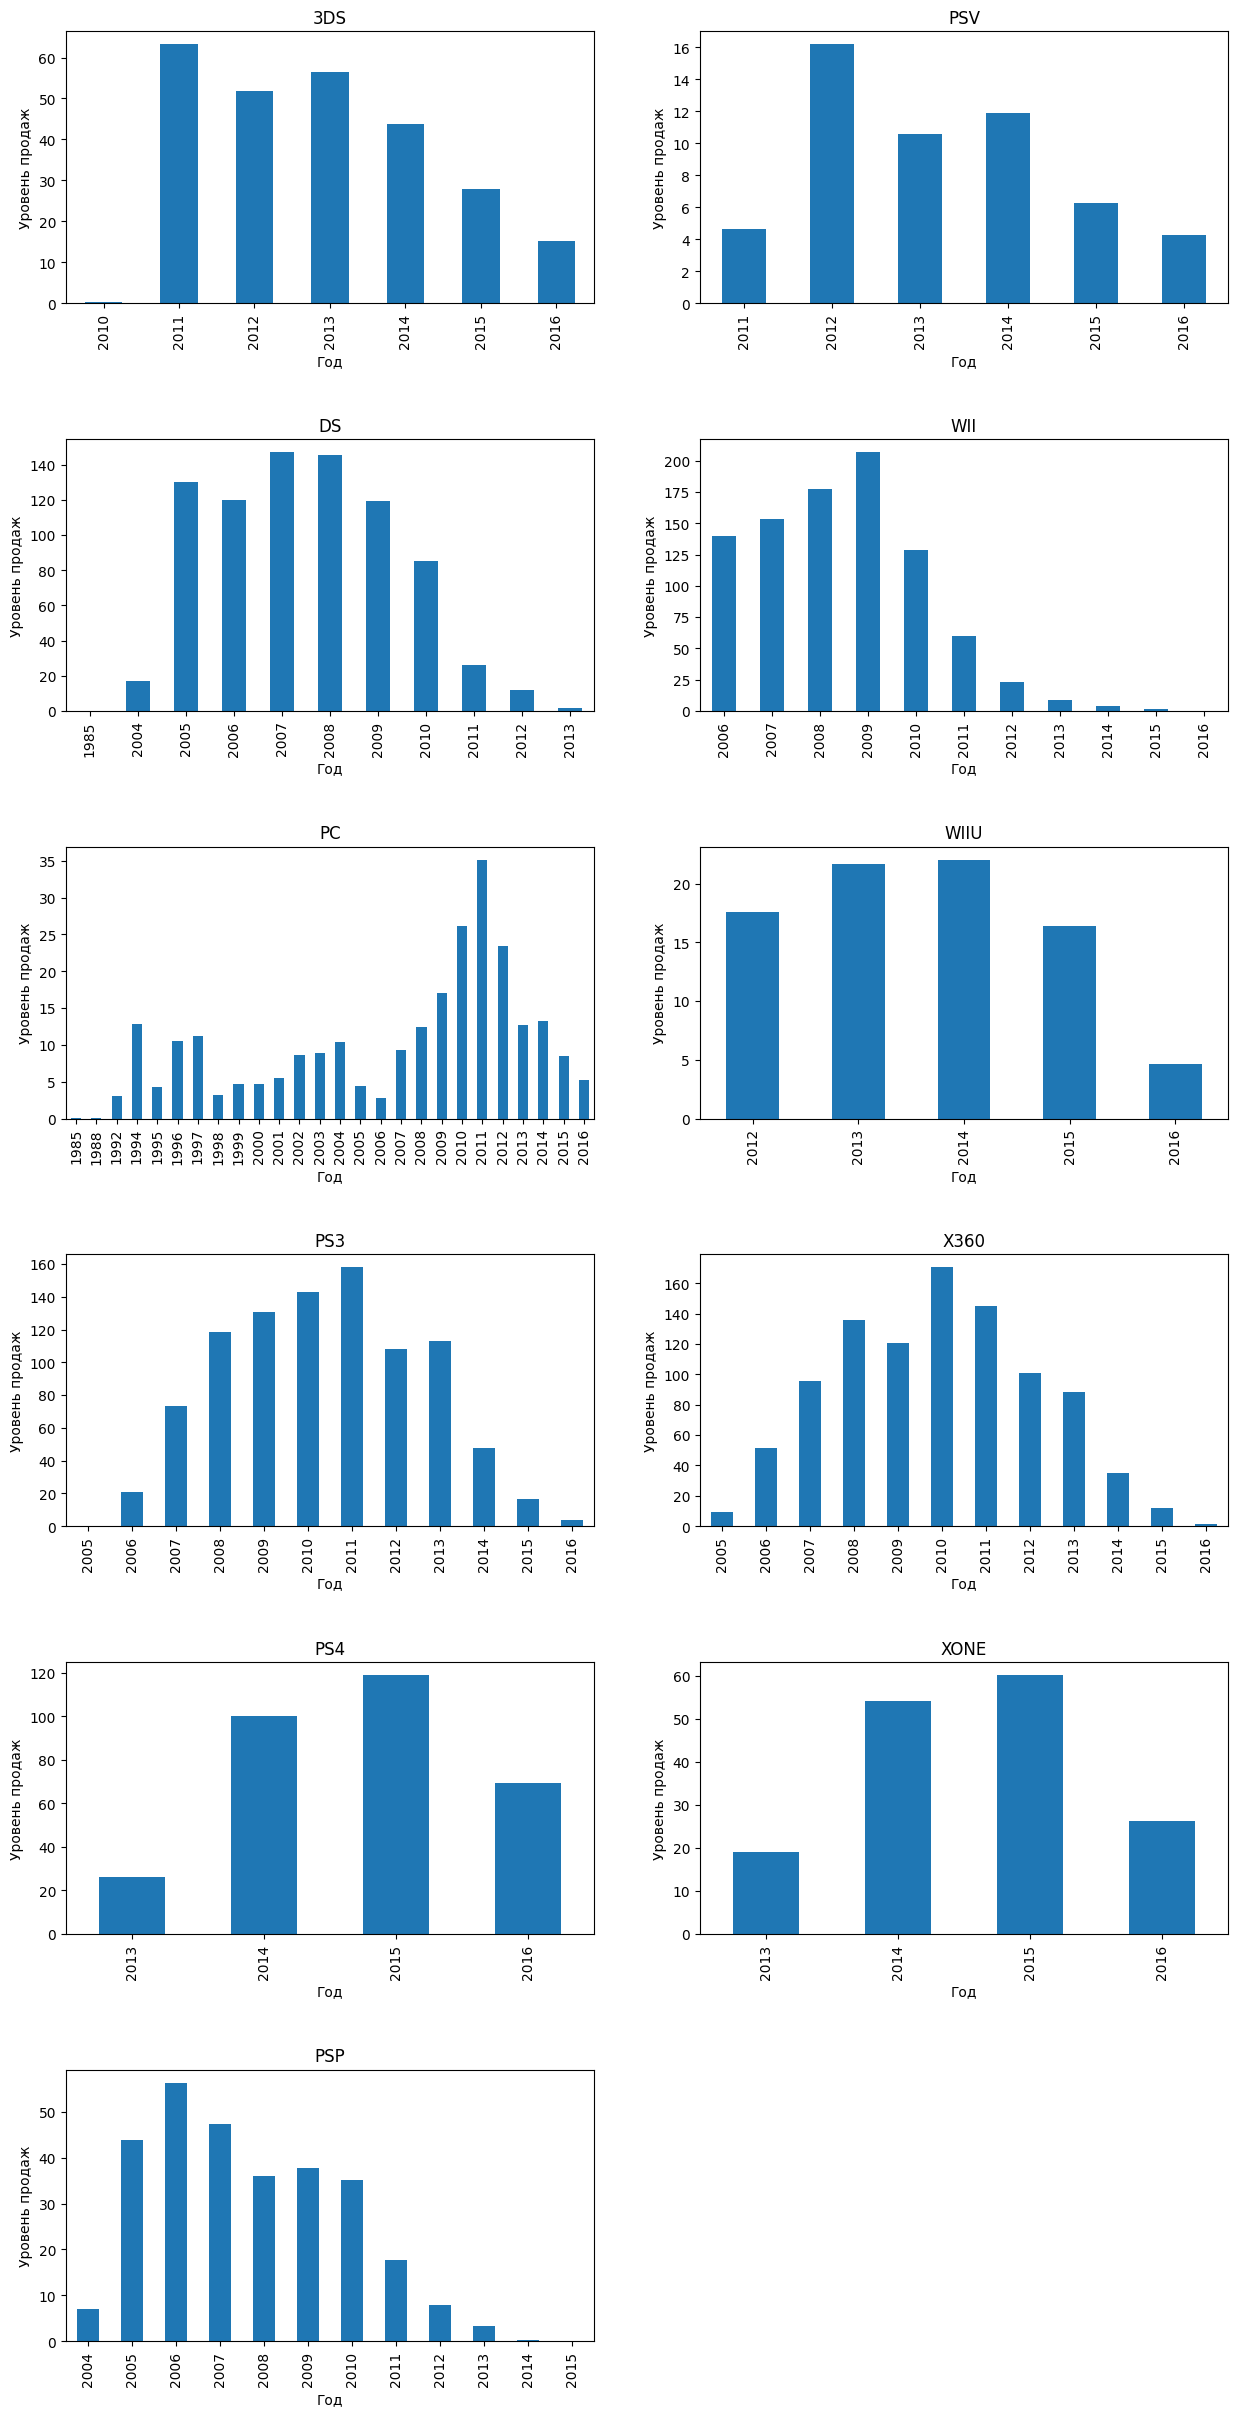

In [52]:
platform_sales = df.pivot_table(
    index=["platform", "year_of_release"], values="total_sales", aggfunc="sum"
).reset_index()
figure, ax = plt.subplots(6, 2, figsize=(15, 30), gridspec_kw={"hspace": 0.5})
i = 0
j = 0
for platform in new_platform_sales["platform"].unique():
    platform_sales[platform_sales["platform"] == platform].plot(
        ax=ax[i, j],
        kind="bar",
        x="year_of_release",
        y="total_sales",
        legend=False,
        xlabel="Год",
        ylabel="Уровень продаж",
        title=platform.upper(),
    )
    i += 1
    if i == 6:
        i = 0
        j = 1
figure.delaxes(ax=ax[5, 1])

**Вывод:**  
В список потенциально прибыльных платформ попадают: 
- XOne 
- WiiU 
- PS4
- PC
- 3DS  

В списке присутствуют как "новые", расстущие (PS4, XOne), так и устаревающие (WiiU, Nintendo 3DS) платформы, которые еще не пришли к своему закату. Ну и вечный PC, куда без него.

### Ящик с усами по глобальным продажам в разбивке по платформам

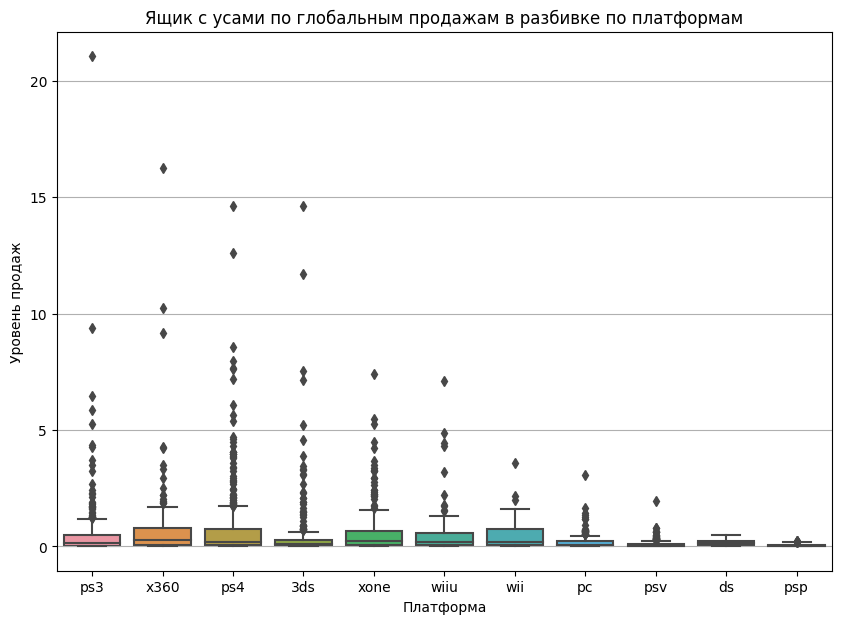

In [53]:
plt.figure(figsize=(10, 7))
plt.grid()
sns.boxplot(
    data=df_new,
    x="platform",
    y="total_sales",
)
plt.ylabel("Уровень продаж")
plt.xlabel("Платформа")
plt.title("Ящик с усами по глобальным продажам в разбивке по платформам")

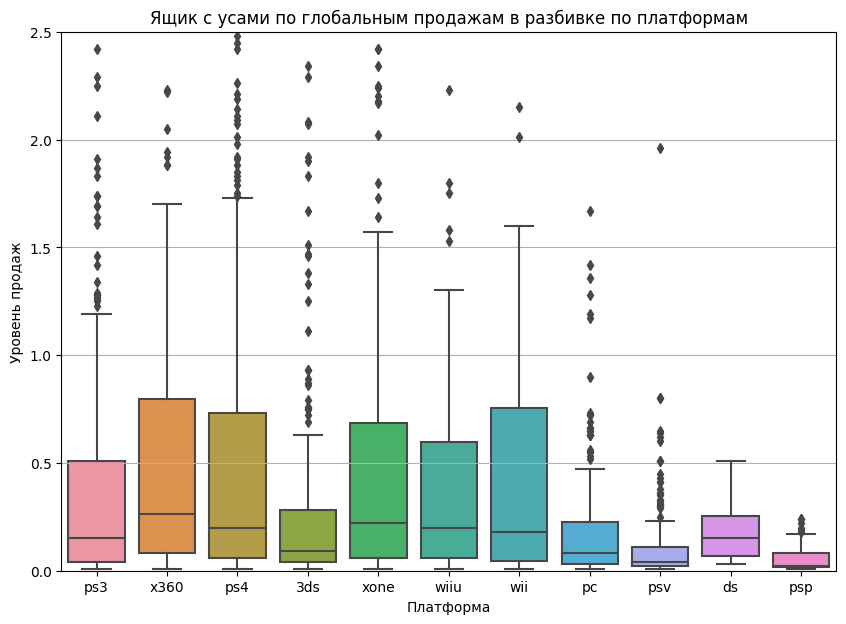

In [54]:
plt.figure(figsize=(10, 7))
plt.grid()
sns.boxplot(data=df_new, x="platform", y="total_sales")
plt.ylim(0, 2.5)
plt.ylabel("Уровень продаж")
plt.xlabel("Платформа")
plt.title("Ящик с усами по глобальным продажам в разбивке по платформам")

**Вывод:** Удачные проекты на популярных платформах могут иметь продажи более 10, 15 или даже 20 млн копий в рамках одной платформы. Однако таких проектов единицы. Проект с числом продаж, уходящим за третий квартиль, но менее 10 млн копий, уже более частое явление - десятки примеров. Для многих платформ уровень третьего квартиля устанавливается в районе 1.25-1.75 млн копий, а медианное значение около 0.2-0.25 млн копий.  

### Корреляция продаж и оценок

#### Одна из популярных платформ

В качестве популярной платформы выберем PS4, поскольку данная платформа относится к последнему поколению и имеет хорошие показатели продаж.

In [55]:
rating_sales = df_new[df_new["platform"] == "ps4"]
rating_sales.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10793,gundam breaker 3,ps4,2016,action,0.00,0.00,0.10,0.00,NaN,NaN,UNKNOWN,0.10
16362,crows: burning edge,ps4,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,UNKNOWN,0.01
749,madden nfl 15,ps4,2014,sports,1.54,0.25,0.00,0.40,81.0,6.1,E,2.19
767,overwatch,ps4,2016,shooter,0.81,0.85,0.15,0.33,90.0,6.1,T,2.14
8057,saint seiya: soldiers' soul,ps4,2015,fighting,0.00,0.12,0.04,0.02,59.0,7.8,T,0.18


Корреляция оценок критиков и продаж: 0.391


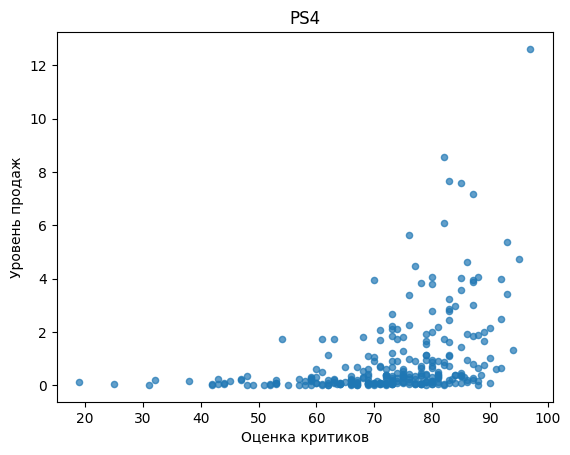

In [56]:
rating_sales.plot(
    kind="scatter",
    x="critic_score",
    y="total_sales",
    alpha=0.7,
    xlabel="Оценка критиков",
    ylabel="Уровень продаж",
    title="PS4",
)
print(
    "Корреляция оценок критиков и продаж:",
    round(rating_sales["critic_score"].corr(rating_sales["total_sales"]), 3),
)

Корреляция пользовательских оценок и продаж: -0.022


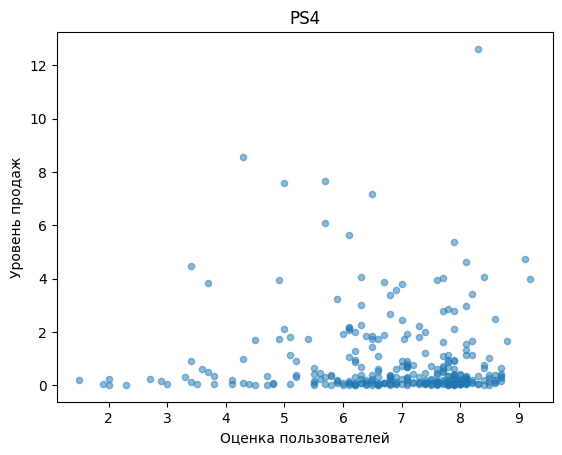

In [57]:
rating_sales.plot(
    kind="scatter",
    x="user_score",
    y="total_sales",
    alpha=0.5,
    xlabel="Оценка пользователей",
    ylabel="Уровень продаж",
    title="PS4",
)
print(
    "Корреляция пользовательских оценок и продаж:",
    round(rating_sales["user_score"].corr(rating_sales["total_sales"]), 3),
)

**Вывод:** Видно, что отзывы критиков слабо влияют на продажи, в то время как влияние оценки пользователей отсутствует. 

#### Прочие платформы

Построим диаграмму рассеяния и расчитаем корреляцию для оставшихся платформ:

Корреляция оценок критиков и продаж на плафторме PS3 : 0.292
Корреляция оценок критиков и продаж на плафторме X360 : 0.289
Корреляция оценок критиков и продаж на плафторме 3DS : 0.342
Корреляция оценок критиков и продаж на плафторме XONE : 0.376
Корреляция оценок критиков и продаж на плафторме WIIU : 0.377
Корреляция оценок критиков и продаж на плафторме WII : 0.443
Корреляция оценок критиков и продаж на плафторме PC : 0.197
Корреляция оценок критиков и продаж на плафторме PSV : 0.264
Корреляция оценок критиков и продаж на плафторме DS : 0.607
Корреляция оценок критиков и продаж на плафторме PSP : 0.191


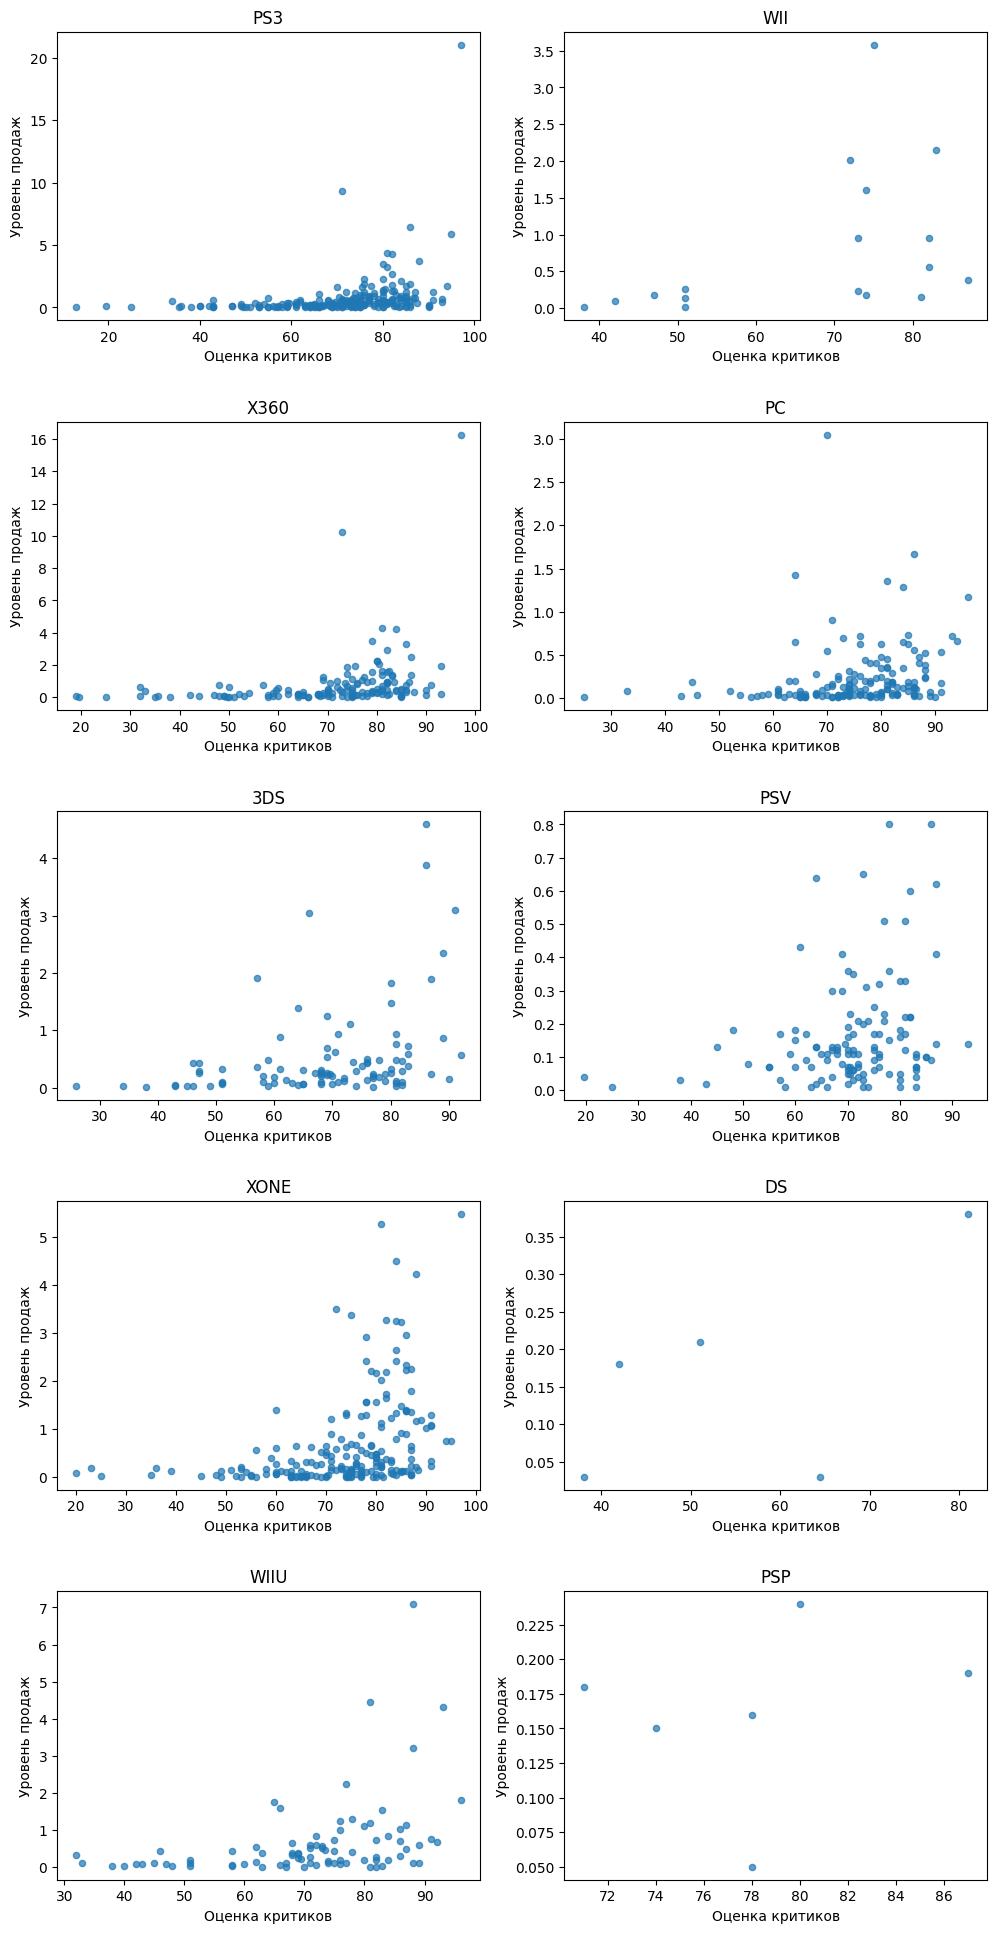

In [58]:
figure, ax = plt.subplots(5, 2, figsize=(12, 24), gridspec_kw={"hspace": 0.35})
i = 0
j = 0
for platform in df_new["platform"].unique():
    if platform != "ps4":
        rating_sales = df_new[df_new["platform"] == platform]
        rating_sales.plot(
            ax=ax[i, j],
            kind="scatter",
            x="critic_score",
            y="total_sales",
            alpha=0.7,
            xlabel="Оценка критиков",
            ylabel="Уровень продаж",
            title=platform.upper(),
        )
        i += 1
        if i == 5:
            i = 0
            j = 1
        print(
            "Корреляция оценок критиков и продаж на плафторме",
            platform.upper(),
            ":",
            round(rating_sales["critic_score"].corr(rating_sales["total_sales"]), 3),
        )

Корреляция пользовательских оценок и продаж на платформе PS3 : 0.008
Корреляция пользовательских оценок и продаж на платформе X360 : -0.013
Корреляция пользовательских оценок и продаж на платформе 3DS : 0.286
Корреляция пользовательских оценок и продаж на платформе XONE : -0.096
Корреляция пользовательских оценок и продаж на платформе WIIU : 0.398
Корреляция пользовательских оценок и продаж на платформе WII : 0.39
Корреляция пользовательских оценок и продаж на платформе PC : -0.106
Корреляция пользовательских оценок и продаж на платформе PSV : 0.064
Корреляция пользовательских оценок и продаж на платформе DS : 0.042
Корреляция пользовательских оценок и продаж на платформе PSP : -0.186


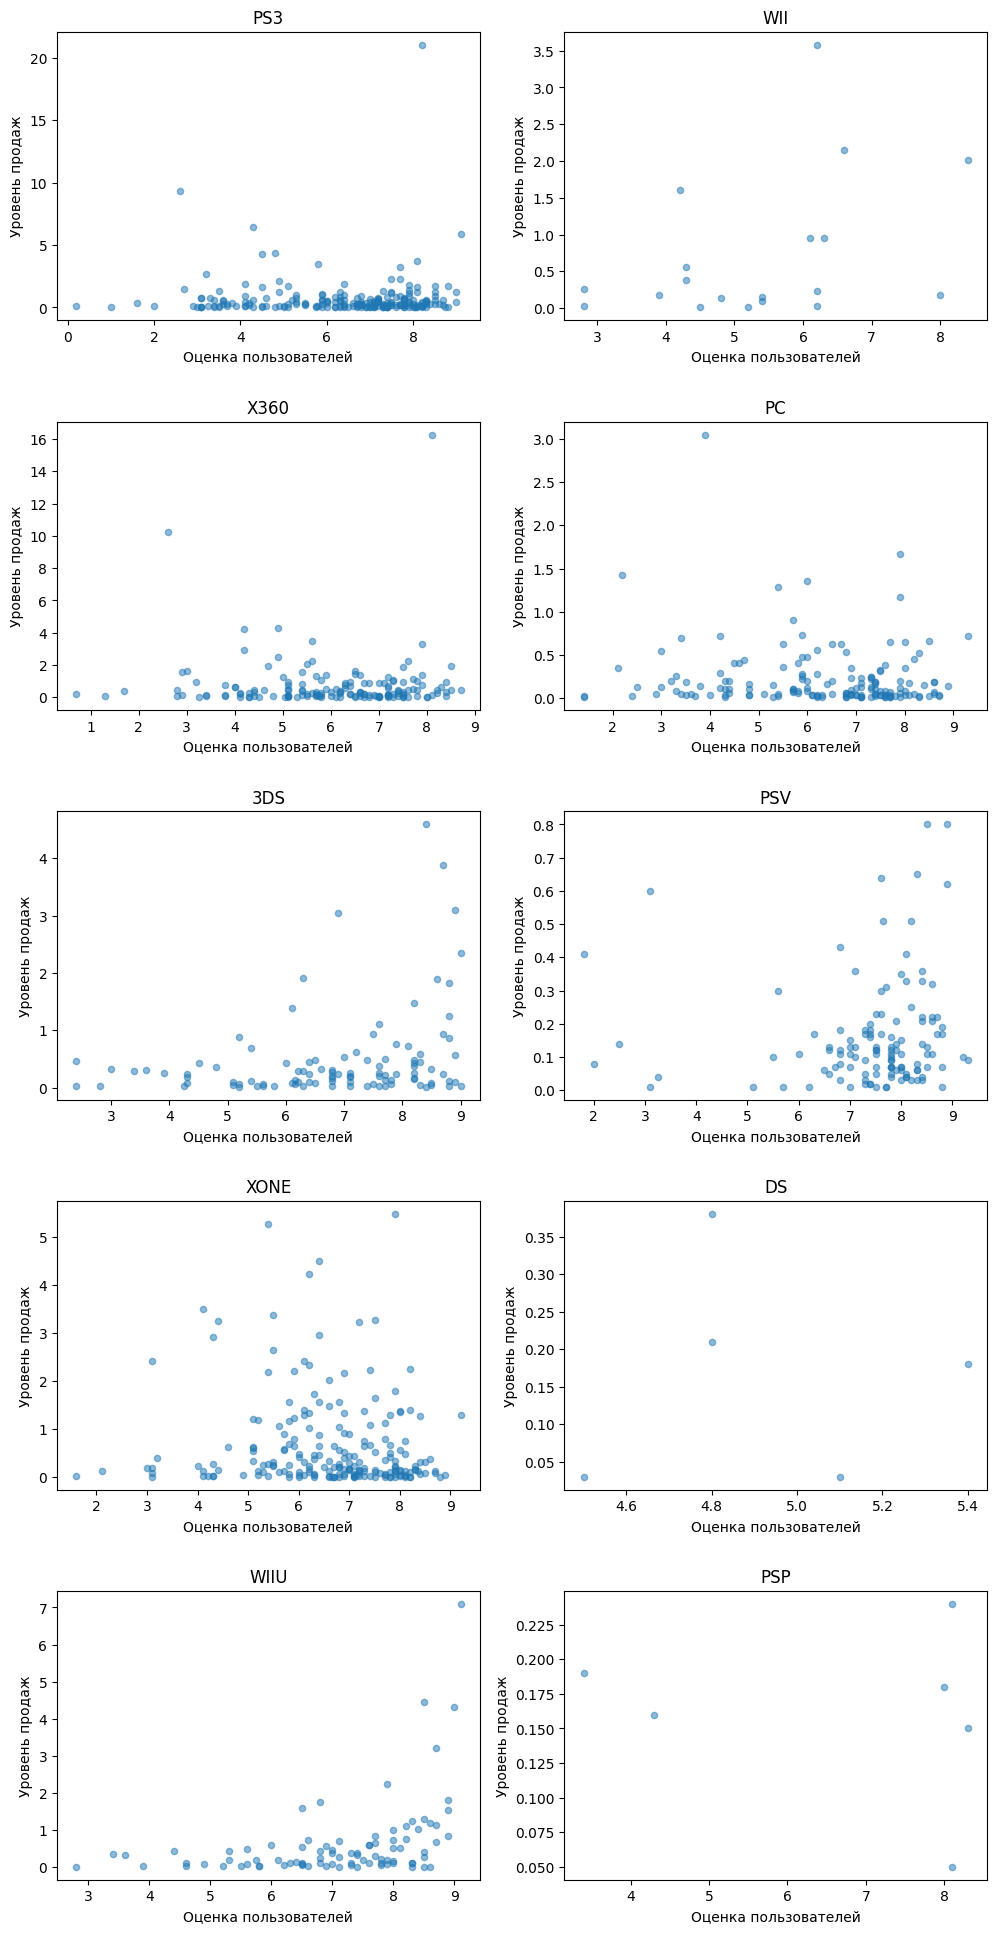

In [59]:
figure, ax = plt.subplots(5, 2, figsize=(12, 24), gridspec_kw={"hspace": 0.35})
i = 0
j = 0
for platform in df_new["platform"].unique():
    if platform != "ps4":
        rating_sales = df_new[df_new["platform"] == platform]
        rating_sales.plot(
            ax=ax[i, j],
            kind="scatter",
            x="user_score",
            y="total_sales",
            alpha=0.5,
            xlabel="Оценка пользователей",
            ylabel="Уровень продаж",
            title=platform.upper(),
        )
        i += 1
        if i == 5:
            i = 0
            j = 1
        print(
            "Корреляция пользовательских оценок и продаж на платформе",
            platform.upper(),
            ":",
            round(rating_sales["user_score"].corr(rating_sales["total_sales"]), 3),
        )

**Вывод:** Полученные по остальным платформам данные говорят о том, что отзывы критиков имеют более серьезное влияние на продажи на всех платформах. Отличились пользователи wiiu: их отзывы влияют на продажи сильнее, чем отзывы критиков. 

Также на диаграммах рассеяния легко заметить, что платформы psp и wii полностью потеряли актуальность. 

#### Топ популярности жанров

In [60]:
genres_sales = df_new.pivot_table(
    index="genre", values="total_sales", aggfunc="sum"
).sort_values(by="total_sales", ascending=False)
genres_sales

,total_sales
genre,
action,322.15
shooter,232.98
sports,150.65
role-playing,145.89
misc,63.06
platform,42.63
racing,39.89
fighting,35.31
adventure,23.64


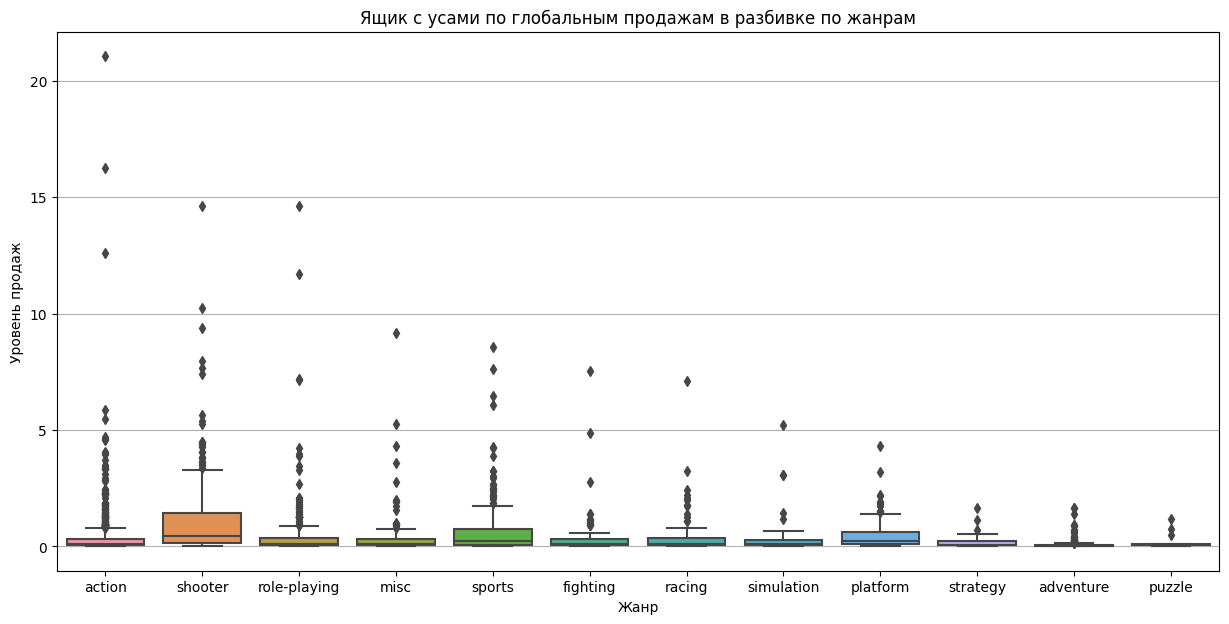

In [61]:
plt.figure(figsize=(15, 7))
plt.grid()
sns.boxplot(data=df_new, x="genre", y="total_sales")
plt.xlabel("Жанр")
plt.ylabel("Уровень продаж")
plt.title("Ящик с усами по глобальным продажам в разбивке по жанрам")

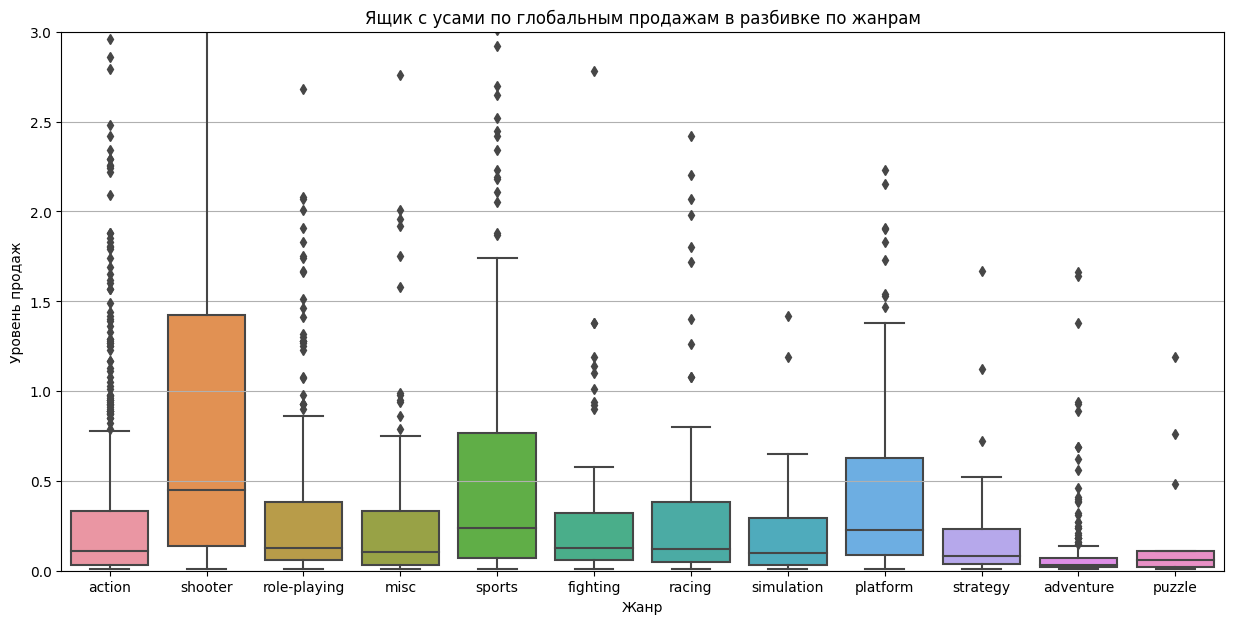

In [62]:
plt.figure(figsize=(15, 7))
plt.grid()
sns.boxplot(data=df_new, x="genre", y="total_sales")
plt.ylim(0, 3)
plt.xlabel("Жанр")
plt.ylabel("Уровень продаж")
plt.title("Ящик с усами по глобальным продажам в разбивке по жанрам")

**Вывод:** тройка жанров с стабильно высокими продажами: shooter, sports и platform. 

Несмотря на крупнейшие суммарные продажи, жанр action имеет средние медианные показатели продаж и не попадает в тройку самых прибыльных жанров.

### Вывод по этапу

В ходе выполнения исследовательского анализа были определены следующие особенности: 
- Рост числа выходящих игр происходит дважды: в 90-х и 00-х. Имеется пик на отметке 2008 года, после которого число выходящих игр стало заметно уменьшаться; 
- Тремя наиболее популярными платформами за все время являются PS2, PS3 и Xbox 360. Средний жизненый цикл платформы составляет 5-10 лет, исключением является PC - он вечен; 
- Были определены Топ-5 самых популярных платформ за последние 5 лет, имеющие большой потенциал в количестве продаж игрового контента; 
- При помощи графика "ящик с усами" определено, что для многих платформ уровень третьего квартиля устанавливается в районе 1.25-1.75 млн проданных копий, а медианное значение около 0.2-0.25 млн копий. Уровень продаж выше третьего квартиля, но до 10 млн копий, соответствует десяткам игр, за 10 млн копий - единицам. 
- Составлен топ популярности жанров за все время: 
    1. Shooter
    1. Sports
    1. Platform
- Рассчитана корреляция продаж и оценок. На большинстве платформ на продажи либо влияют только оценки критиков, либо же влияение оценок критиков больше, чем влияние пользовательских оценок. Исключением служит платформа WiiU. 
    

## Портрет пользователя в регионах

### Топ-5 самых популярных платформ 

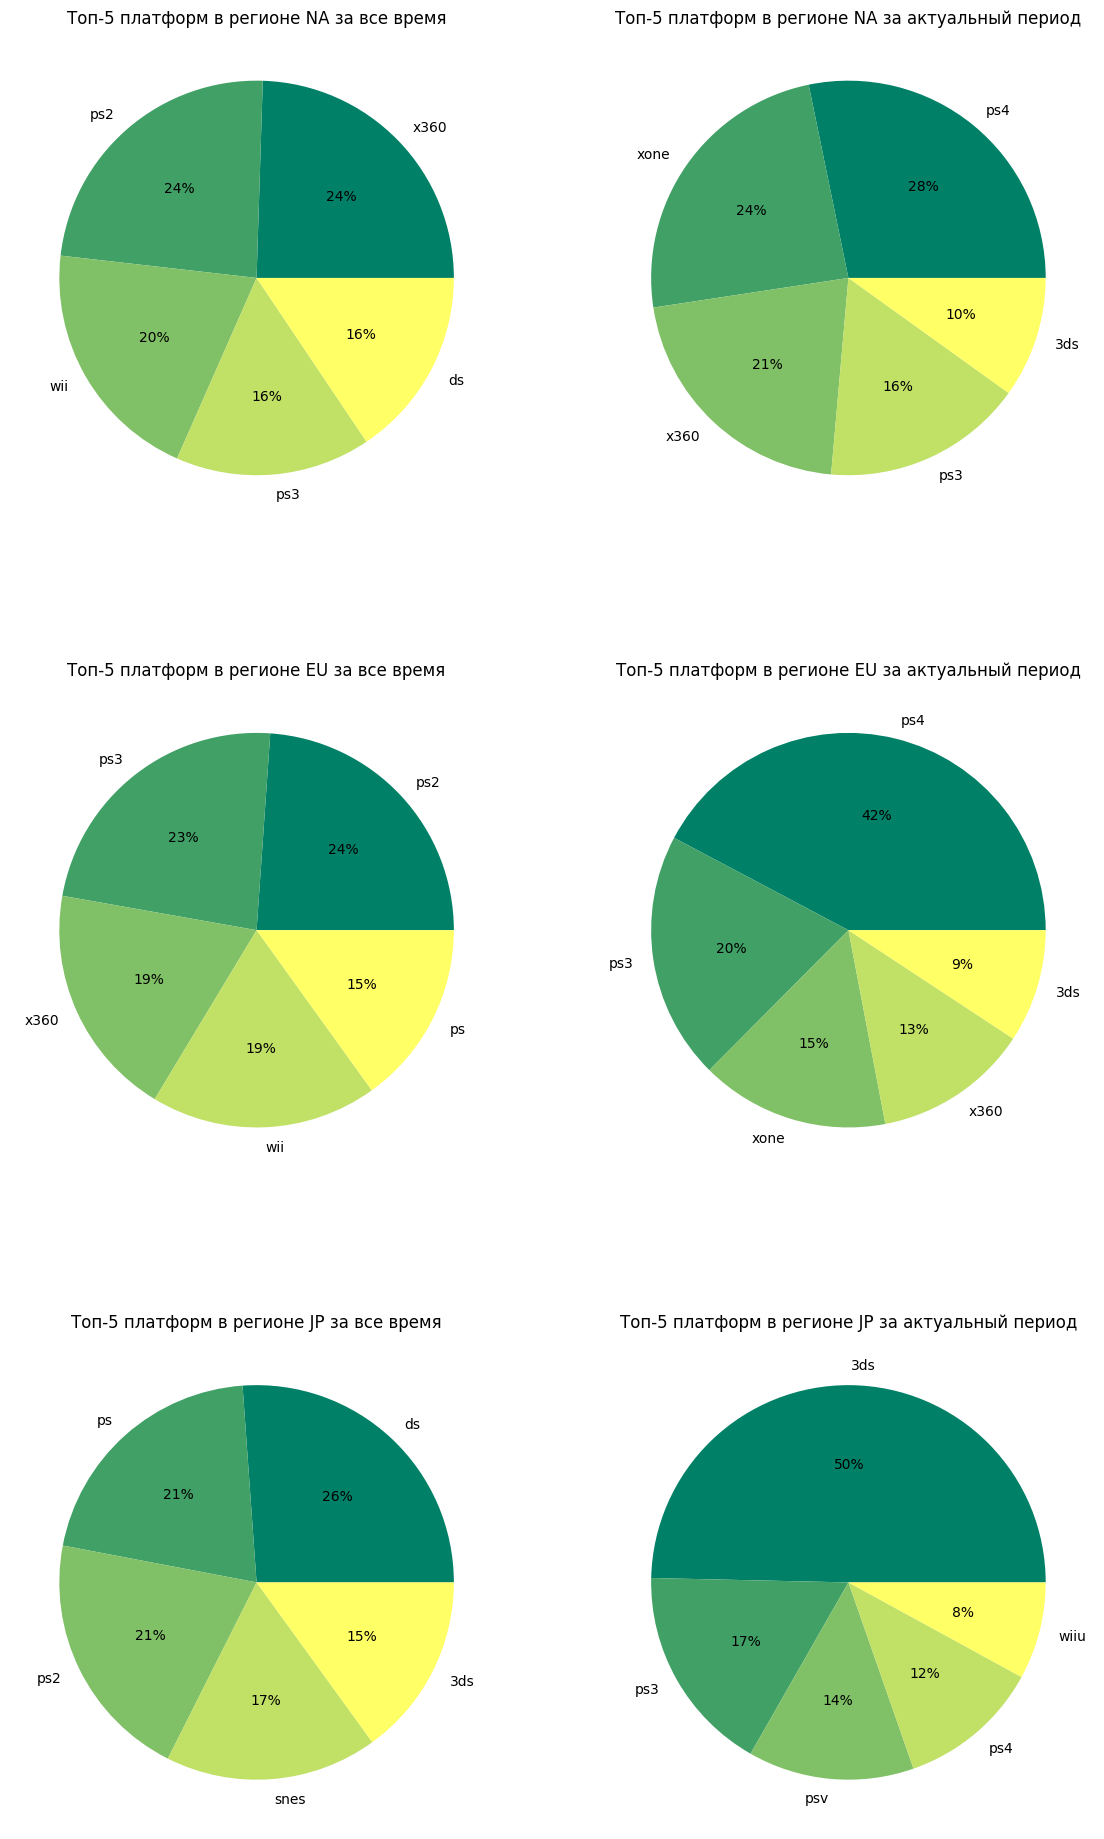

In [63]:
regions = ["na", "eu", "jp"]
figure, ax = plt.subplots(3, 2, figsize=(14, 24))
i = 0
j = 0
for region in regions:
    values_name = region + "_sales"
    title = "Топ-5 платформ в регионе " + region.upper() + " за все время"
    top5_platforms = df.pivot_table(
        index="platform", values=values_name, aggfunc="sum"
    ).sort_values(by=values_name, ascending=False)
    top5_platforms.head(5).plot(
        ax=ax[i, j],
        kind="pie",
        y=values_name,
        autopct="%1.0f%%",
        cmap="summer",
        legend=False,
        ylabel="",
        title=title,
    )
    values_name_new = region + "_sales"
    title_new = "Топ-5 платформ в регионе " + region.upper() + " за актуальный период"
    top5_platforms_new = df_new.pivot_table(
        index="platform", values=values_name_new, aggfunc="sum"
    ).sort_values(by=values_name_new, ascending=False)
    top5_platforms_new.head(5).plot(
        ax=ax[i, j + 1],
        kind="pie",
        y=values_name_new,
        autopct="%1.0f%%",
        cmap="summer",
        legend=False,
        ylabel="",
        title=title_new,
    )
    i += 1

**North America**  

Высокая популярность консолей PS и Xbox текущего и прошлого поколения с примерно равными долями между брендами, а также значительное присутствие на рынке компактного решения от Nintendo. 

**Europe**  

Консоли PS занимают бóльшую долю рынка, чем Xbox. Компактное решение Nintendo имеет примерно ту же долю, что в северо-американском регионе.

**Japan**  

Видна заметная и стабильная популярность компактных решений, отсутствует Xbox в обоих топах. Половина текущего рынка занята компактной консолью Nintendo 3DS.  

### Топ-5 самых популярных жанров

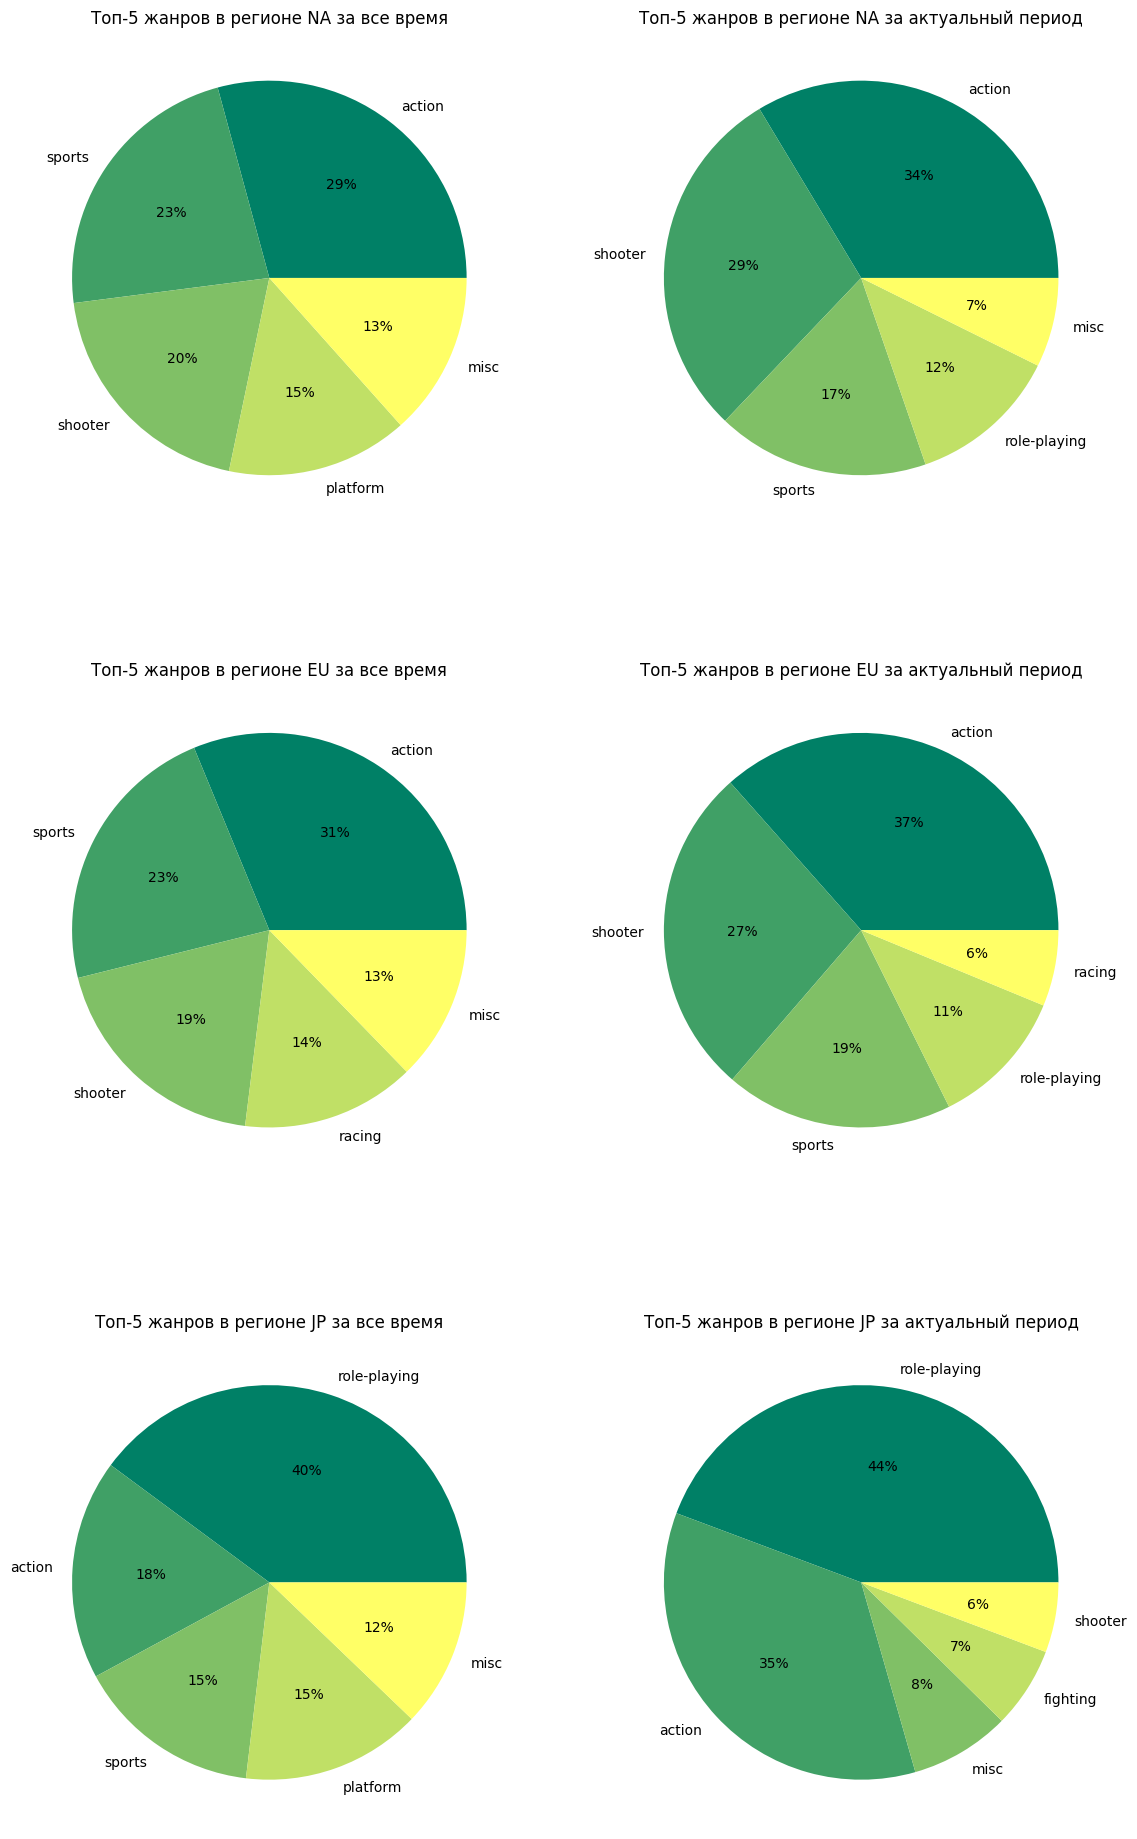

In [64]:
regions = ["na", "eu", "jp"]
figure, ax = plt.subplots(3, 2, figsize=(14, 24))
i = 0
j = 0
for region in regions:
    values_name = region + "_sales"
    title = "Топ-5 жанров в регионе " + region.upper() + " за все время"
    top5_platforms = df.pivot_table(
        index="genre", values=values_name, aggfunc="sum"
    ).sort_values(by=values_name, ascending=False)
    top5_platforms.head(5).plot(
        ax=ax[i, j],
        kind="pie",
        y=values_name,
        autopct="%1.0f%%",
        cmap="summer",
        legend=False,
        ylabel="",
        title=title,
    )
    values_name_new = region + "_sales"
    title_new = "Топ-5 жанров в регионе " + region.upper() + " за актуальный период"
    top5_platforms_new = df_new.pivot_table(
        index="genre", values=values_name_new, aggfunc="sum"
    ).sort_values(by=values_name_new, ascending=False)
    top5_platforms_new.head(5).plot(
        ax=ax[i, j + 1],
        kind="pie",
        y=values_name_new,
        autopct="%1.0f%%",
        cmap="summer",
        legend=False,
        ylabel="",
        title=title_new,
    )
    i += 1

**North America**

Жанр action захватил бóльшую долю рынка, shooter'ы потеснили спортивные игры со второго места. Role-play почетно занял четвертое место, заменив собой платформеры.

**Europe**

В целом, ситуация полностью аналогична северо-американскому региону. Европейцы отдают чуть большее предпочтение жанру action, чем shooter'ам. 

**Japan**

В последние года любовь японцев к role-play только усилилась, также им пришелся по вкусу жанр action. Больше всего изменились 3, 4 и 5 места: спортивные игры пропали из топа, жанр misc перешел на 3 место, 4 место занял жанр fighting, появился интерес к shooter'ам.

### Влияние рейтинга ESRB на продажи в регионе NA

In [65]:
na_esrb = (
    df_new.groupby("rating")
    .agg({"na_sales": "sum", "name": "count"})
    .rename(columns={"name": "games_with_rating"})
)
na_esrb["sell_rate"] = na_esrb["na_sales"] / na_esrb["games_with_rating"]
na_esrb.sort_values(by="sell_rate", ascending=False)

,na_sales,games_with_rating,sell_rate
rating,,,
M,167.65,389,0.430977
E,79.10,313,0.252716
E10+,55.86,264,0.211591
T,50.48,350,0.144229
UNKNOWN,84.64,920,0.092000


**Вывод:** логично предположить, что игры с рейтингом E (Everyone) должны продаваться лучше, чем игры с рейтингом M (17+), за счет ориентированности на более широкие массы пользователей. Однако, в Северо-Американском регионе это не так. Третье место по продажам имеют игры с рейтингом E10+ (Everyone 10+). Если переводить это на человеческий язык, то получатеся что в Северо-Американском регионе больше всего любят игры, где может присутствовать (по словам сайта ESRB) насилие, кровь и увечья, материалы сексуального характера и/или ненормативная лексика, что соответствует GTA, CoD, BF, The Last of Us, RDR, FarCry, Dying Light и т.д, в общем, большинству самых известных игровых проектов.

### Влияние рейтинга ESRB на продажи в регионе EU

In [66]:
eu_esrb = (
    df_new.groupby("rating")
    .agg({"eu_sales": "sum", "name": "count"})
    .rename(columns={"name": "games_with_rating"})
)
eu_esrb["sell_rate"] = eu_esrb["eu_sales"] / eu_esrb["games_with_rating"]
eu_esrb.sort_values(by="sell_rate", ascending=False)

,eu_sales,games_with_rating,sell_rate
rating,,,
M,148.39,389,0.381465
E,83.87,313,0.267955
E10+,44.85,264,0.169886
T,42.34,350,0.120971
UNKNOWN,73.01,920,0.079359


**Вывод:** картина, по сути, не отличается от Северо-Американского региона. Самыми популярными остаются игры с рейтингом M. 

###  Влияние рейтинга ESRB на продажи в регионе JP

In [67]:
jp_esrb = (
    df_new.groupby("rating")
    .agg({"jp_sales": "sum", "name": "count"})
    .rename(columns={"name": "games_with_rating"})
)
jp_esrb["sell_rate"] = jp_esrb["jp_sales"] / na_esrb["games_with_rating"]
jp_esrb.sort_values(by="sell_rate", ascending=False)

,jp_sales,games_with_rating,sell_rate
rating,,,
UNKNOWN,83.60,920,0.090870
T,21.75,350,0.062143
E,15.18,313,0.048498
M,14.50,389,0.037275
E10+,5.99,264,0.022689


**Вывод:** японцы примерно одинаково любят игры с рейтингом T, E и M, но наибольшей популярностью пользуется рейтинг UNKNOWN. Похоже, что в Японии ценятся игры, выпускающиеся специально для данного региона и поэтому не имеющие рейтинга ESRB. 

### Вывод по этапу

Были полученые следующие портреты пользователей:

**North America:**
- Предпочитают играть на актуальных платформах PlayStation или Xbox
- Любят жанры Action, Shooter и Sports
- Любят игры с рейтингом ESRB M

**Europe:**
- Отдают предпочтения консолям PlayStation, в меньшей степени Xbox
- Любят жанры Action, Shooter и Sports
- Любят игры с рейтингом ESRB M

**Japan:** 
- Не пользуются консолями Xbox, любят играть в дороге на компактных консолях, половина рынка занята Nintendo 3DS
- Предпочитают жанры Role-play, Action и Misc
- Игры с рейтингом ESRB T, E и M примерно одинаково популярны, а наибольшей популярностью пользуются игры без рейтинга

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

За нулевую гипотезу примем что средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Альтернативной гипотезой будет утверждение, что средние пользовательские рейтинги платформ Xbox One и PC различаются.

Для проверки гипотезы будем использовать выборки за те годы, когда существовали обе платформы, то есть за период 2013-2016 гг. 

In [68]:
rating_xone = df_new[(df_new["platform"] == "xone") & (~df_new["user_score"].isna())][
    "user_score"
]
rating_pc = df_new[(df_new["platform"] == "pc") & (~df_new["user_score"].isna())][
    "user_score"
]

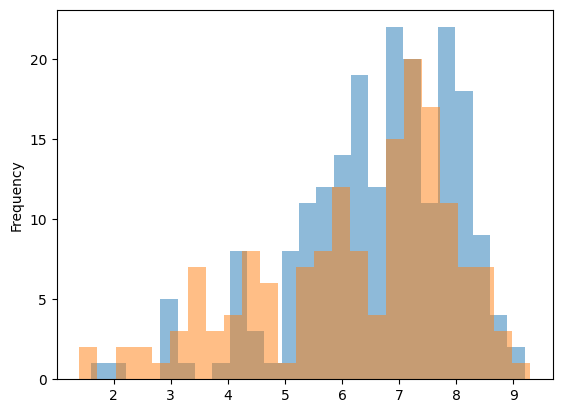

In [69]:
rating_xone.plot(kind="hist", bins=25, alpha=0.5)
rating_pc.plot(kind="hist", bins=25, alpha=0.5)

In [70]:
result = st.ttest_ind(rating_xone, rating_pc)
alpha = 0.05
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


**Вывод:** похоже что гипотеза о равенстве пользовательских рейтингов платформ Xbox One и PC не может быть принята. Значит, рабочей считается гипотеза, говорящая что пользовательские рейтинги на платформах разные.

### Средние пользовательские рейтинги жанров Action и Sports разные

За нулевую гипотезу примем что средние пользовательские рейтинги жанров Action и Sports одинаковы. Тогда альтернативной гипотизой будет утверждение что средние пользовательские рейтинги жанров Action и Sports разные. 

In [71]:
rating_action = df_new[(df_new["genre"] == "action") & (~df_new["user_score"].isna())][
    "user_score"
]
rating_sports = df_new[(df_new["genre"] == "sports") & (~df_new["user_score"].isna())][
    "user_score"
]

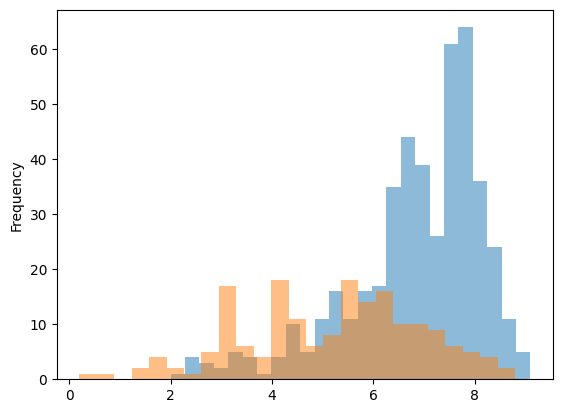

In [72]:
rating_action.plot(kind="hist", bins=25, alpha=0.5)

rating_sports.plot(kind="hist", bins=25, alpha=0.5)

In [73]:
result = st.ttest_ind(rating_action, rating_sports)
alpha = 0.05
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


**Вывод:** нулевая гипотеза отвергнута, значит принимается первоначальная - средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод по этапу

Был применен метод `.ttest_ind` для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. В данном случае выборками являются данные из датасета, поскольку неизвестно какую часть из всех существующих игр мы рассматриваем. Выбор метода обусловлен независимостью выборок. Критерием оценки выбран уровень значимости. 

Гипотеза, утверждающая, что средние пользовательские рейтинги платформ Xbox и PC одинаковы, статистически отвергнута, из-за чего актуальной считается альтернативная: средние пользовательские рейтинги платформ Xbox и PC разные.

Гипотеза, утверждающая, что средние пользовательские рейтинги жанров Action и Sports одинаковы принята.

Альтернативные гипотезы были составлены исходя из следующих соображений:  
- При рассмотрении гипотезы что средние пользовательские рейтинги платформ Xbox и PC одинаковы нас не интересует соотношение рейтингов, поэтому альтернативная гипотеза подводится под **двухсторонний ttest**. 
- Аналогично в случае жанров Action и Sports. Только здесь следует обратить внимание, что интересующая нас гипотеза становится альтернативной, а альтернативная используется как нулевая. Это сделано для простоты проверки. Таким образом, необходимость использовать **двусторонний ttest** оказывается определена изначально. 

## Общий вывод по исследованию

В ходе выполнения работы был исследован датасет, содержащий в себе информацию по играм, выходившим в период с 1980 по 2016 гг.   
**Были выполнены следующие действия:** 
- Предпобработка данных с целью их подготовки к дальнейшему исследованию, в ходе которой были убраны дубликаты, проверены типы данных, обработаны пропуски;
- Расчет суммарных продаж по всем регионам и добавление данных в новый столбец
- Исследовательский анализ, посвященный рассмотрению статистики выхода игр по годам, распределения продаж по платформам и годам, определению актуального для исследования периода и платформ, анализу глобальных продаж по платформам при помощи графика "ящик с усами", а также расчету корреляции продаж и оценок, поиску самых популярных жанров
- Составление портрета среднего пользователя в таких регионах, как Северная Америка, Европа и Япония
- Проверка гипотез о пользовательских рейтингах

**В результате были получены следующие выводы:** 
- Рост числа выходящих игр происходит дважды: в 90-х и 00-х. Имеется пик на отметке 2008 года, после которого число выходящих игр стало заметно уменьшаться; 
- Тремя наиболее популярными платформами за все время являются PS2, PS3 и Xbox 360. Средний жизненый цикл платформы составляет 5-10 лет, исключением является PC - он вечен; 
- Самыми популярными платформами за последние 3 года являются Xbox One, PS4, PC, WiiU и Nintendo 3DS. Они имеют большой потенциал в количестве продаж игрового контента; 
- При помощи графика "ящик с усами" определено, что для многих платформ уровень третьего квартиля устанавливается в районе 1.25-1.75 млн проданных копий, а медианное значение около 0.2-0.25 млн копий. Уровень продаж выше третьего квартиля, но до 10 млн копий, соответствует десяткам игр, за 10 млн копий - единицам. 
- Составлен топ популярности жанров за все время: 
    1. Shooter
    1. Sports
    1. Platform
- На большинстве платформ на продажи либо влияют только оценки критиков, либо же влияение оценок критиков ощутимее, чем влияние пользовательских оценок. Исключением служит платформа WiiU. Для консолей Xbox и PS корреляция оценок критиков и продаж составляет ~0.4, что говорит о слабом уровне влияния оценок критиков на продажи;

**Были полученые следующие портреты пользователей:**

**North America:**
- Предпочитают играть на актуальных платформах PlayStation или Xbox
- Любят жанры Action, Shooter и Sports
- Любят игры с рейтингом ESRB M, E и E10+

**Europe:**
- Отдают предпочтения консолям PlayStation, в меньшей степени Xbox
- Любят жанры Action, Shooter и Sports
- Любят игры с рейтингом ESRB M, E и E10+

**Japan:** 
- Не пользуются консолями Xbox, любят играть в дороге на компактных консолях, половина рынка занята Nintendo 3DS
- Предпочитают жанры Role-play, Action и Misc
- Игры с рейтингом ESRB T, E и M примерно одинаково популярны, а наибольшей популярностью пользуются игры без рейтинга


**В результате проверки гипотез, утверждающих, что**
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные  

**первая была отвергнута, вторая принята. Вместо первой гипотезы за рабочую принята следующая альтернативная гипотеза:** 

- Средние пользовательские рейтинги платформ Xbox One и PC разные
